In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Hello reader!

This document will investigate a small dataset representing results of a test demonstrating the Stroop Effect. The dataset contains 25 pairs of scores in a pre-test, post-test format.

The treatment in this experiment is the randomization of colors used to format the names of colors. The pre-treatment test, named 'congruent,' times test-takers in naming colors where the colored word is the color being named. The treatment test, named 'incongruent,' randomizes the color to be named as a color different than the word to be read.

The independent variable in this experiment is the color treatment, represented as being categorical (congruent vs. incongruent). The dependent variable is time in seconds to complete the experiment, a continuous variable.

Our null and alternative hypotheses are as follows:

H0: Test treatment will not change or decrease completion time.

H1: Test treatment will increase completion time.

The t-distribution used will be a < .05, single-tailed for 95% confidence.

This document will describe the data involved by defining their means, medians, and standard deviations; and drawing histograms and probability density functions of the separate categories.

Because the data in this experiment are paired, we will be using a dependent data t-test to compare the means of each category and determine whether the means are significantly different from one another.

In [44]:
# Reading in CSV and displaying data
stroop = pd.read_csv('C:\Users\Bash\Desktop\Udacity\stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [33]:
# Defining function to describe each Series category. Pandas .std() method defaults
# to sample degrees of freedom n-1, which is appropriate to our data.
def describe_data(series):
    print series.name, "mean:", series.mean()
    print series.name, "median:", series.median()
    print series.name, "standard deviation:", series.std(axis=0)

In [34]:
# Call function using .apply()

stroop.apply(describe_data)

Congruent mean: 14.051125
Congruent median: 14.3565
Congruent standard deviation: 3.55935795765
Incongruent mean: 22.0159166667
Incongruent median: 21.0175
Incongruent standard deviation: 4.79705712247


Congruent      None
Incongruent    None
dtype: object

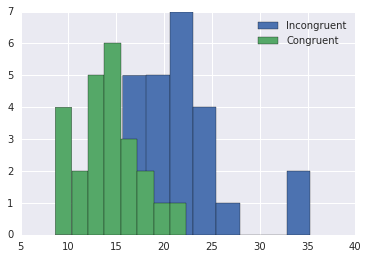

In [39]:
# Create histograms of data
plt.hist(stroop.Incongruent,bins=8,label='Incongruent')
plt.hist(stroop.Congruent,bins=8,label='Congruent')
plt.legend()


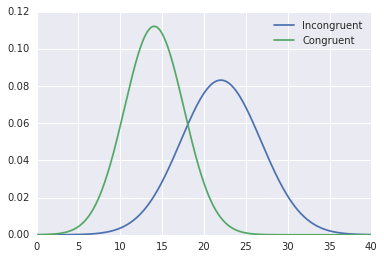

In [42]:
# Create probability density functions of data
x = np.linspace(0,40,1000)
y1 = stats.norm.pdf(x, loc=stroop.Incongruent.mean(), scale=stroop.Incongruent.std())  
y2 = stats.norm.pdf(x, loc=stroop.Congruent.mean(), scale=stroop.Congruent.std()) 
plt.plot(x,y1, label='Incongruent')
plt.plot(x,y2, label='Congruent')
plt.legend()
plt.show()

We may observe the difference between our categories fairly clearly. Compared to pre-treatment data, our Stroop treatment seems to have the following effects:
- Increase of mean time to complete test
- Increase of variability of time to complete test

We will proceed to conduct our dependent value t-test to evaluate whether the effect observed is statistically significant.

In [46]:
# t-test between related values. The SciPy stats pack only operates using two-
# tailed test, but we can dummy the correct output p-value by doubling it.

stats.ttest_rel(stroop.Incongruent,stroop.Congruent)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

Interpretation - 

Our t-statistic is quite high at 8.02, and our p-value is far below a = .05 even when doubled to account for the use of a two-tailed test method.

We may reject our null hypothesis and conclude that the test treatment increases test-taking time in seconds.

Avenues for Further Experimentation - 

I would be interested to see another experiment done with naming swatches of color only (no words) compared with naming incongruent colors and words. With congruent words and colors, it seems there is a cognitive consonance that may aid in recognizing colors. I wonder whether that same dissonance caused by incongruent colors/words would have a significant difference from simply recognizing colors without words.